<a href="https://colab.research.google.com/github/manashpratim/Flower_Recognition/blob/master/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/8782/44566/flowers.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1560954890&Signature=C4S68yCItn46JHtro62IpvAqYJF96tEAScl2VbJ%2BuuUBEIzWtbDHPhkV6qmA%2Bv9y6Dy0eAMW529ZSWvuy12pDnB7Xd2TLXz88ZctDG%2B4nJMnNQh9b97CYB9MtW8teqAPf440wlhyauZ0fYacqGkNU00rpLi6gT6b34glR%2BgQ%2Fb3S4DQMl1Dwwfhc48bY9efReoHGCgl2dEJUHoqGCupz3C9CLfP9t0JrE9UOEVNcNQQ7PZcqDYPQOmHzHuiaUOEk9XZlOVn8B5n67h9Qpj%2FDDOVNXP7fBZd%2FHqi1QfZR84wC6um%2Bb8BSYgMwwtuBzxYtiPAG0A4NveWprCuka2yIwA%3D%3D" \
       -O "/tmp/flowers.zip"

--2019-06-17 01:34:28--  https://storage.googleapis.com/kaggle-datasets/8782/44566/flowers.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1560954890&Signature=C4S68yCItn46JHtro62IpvAqYJF96tEAScl2VbJ%2BuuUBEIzWtbDHPhkV6qmA%2Bv9y6Dy0eAMW529ZSWvuy12pDnB7Xd2TLXz88ZctDG%2B4nJMnNQh9b97CYB9MtW8teqAPf440wlhyauZ0fYacqGkNU00rpLi6gT6b34glR%2BgQ%2Fb3S4DQMl1Dwwfhc48bY9efReoHGCgl2dEJUHoqGCupz3C9CLfP9t0JrE9UOEVNcNQQ7PZcqDYPQOmHzHuiaUOEk9XZlOVn8B5n67h9Qpj%2FDDOVNXP7fBZd%2FHqi1QfZR84wC6um%2Bb8BSYgMwwtuBzxYtiPAG0A4NveWprCuka2yIwA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235781000 (225M) [application/x-zip-compressed]
Saving to: ‘/tmp/flowers.zip’

/tmp/flowers.zip    100%[===================>] 224.86M   127MB/s    in 1.8s    

2019-06-17 01:34:30 (127 MB/s) - ‘/tmp

In [0]:
import os
import zipfile

local_zip='/tmp/flowers.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/flowers')
zip_ref.close()

In [0]:
# Making directories using Python
flowers=['daisy', 'tulip', 'rose', 'sunflower', 'dandelion']

try:
    os.makedirs('/tmp/Flowers/training/')
    os.makedirs('/tmp/Flowers/testing/')
    for flower in flowers:
      os.mkdir('/tmp/Flowers/training/'+flower+'/')
      os.mkdir('/tmp/Flowers/testing/'+flower+'/')
except OSError:
     pass

In [0]:
#Function for Splitting Data
def split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
  files=[]
  
  for filename in os.listdir(SOURCE):
    file=SOURCE+filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + ' is zero length. So ignoring!')
      
  train_length =int(len(files)* SPLIT_SIZE)
  test_length =int(len(files)-train_length)
  
  import random
  suffled_set=random.sample(files,len(files))
  
  train_set=suffled_set[0:train_length]
  test_set=suffled_set[train_length:]
  
  from shutil import copyfile
  for filename in train_set:
    copyfile(SOURCE+filename,TRAINING+filename)
    
  for filename in test_set:
    copyfile(SOURCE+filename,TESTING+filename)
    

In [0]:
#Splitting Data
for flower in flowers:
  SOURCE='/tmp/flowers/flowers/'+flower+'/'
  TRAINING='/tmp/Flowers/training/'+flower+'/'
  TESTING='/tmp/Flowers/testing/'+flower+'/'
  SPLIT_SIZE=0.9
  split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE)
  

In [6]:
for flower in flowers:
  TRAINING='/tmp/Flowers/training/'+flower+'/'
  TESTING='/tmp/Flowers/testing/'+flower+'/'
  print('Total training '+ flower+' images:',len(os.listdir(TRAINING)))
  print('Total testing '+ flower+' images:',len(os.listdir(TESTING)))
  

Total training daisy images: 692
Total testing daisy images: 77
Total training tulip images: 885
Total testing tulip images: 99
Total training rose images: 705
Total testing rose images: 79
Total training sunflower images: 660
Total testing sunflower images: 74
Total training dandelion images: 949
Total testing dandelion images: 106


In [0]:
import tensorflow as tf
from tensorflow import keras

In [20]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
                                 
train_generator=train_datagen.flow_from_directory(
      '/tmp/Flowers/training/',
      target_size=(150,150),
      batch_size=50,
      class_mode='sparse'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      '/tmp/Flowers/testing/',
      target_size=(150,150),
      batch_size=10,
      class_mode='sparse'
)

Found 3888 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [9]:
#Building a ConvNet

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

W0617 01:36:33.451255 140409037449088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer=RMSprop(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_generator,
  epochs=10,
  validation_data=test_generator,
  verbose=1
)

Epoch 1/10
78/78 [==============================] - 16s 210ms/step - loss: 1.6126 - acc: 0.5162 - val_loss: 1.5264 - val_acc: 0.5126
Epoch 2/10
78/78 [==============================] - 13s 168ms/step - loss: 1.0754 - acc: 0.5921 - val_loss: 1.0470 - val_acc: 0.5885
Epoch 3/10
78/78 [==============================] - 13s 163ms/step - loss: 0.8602 - acc: 0.6633 - val_loss: 0.9811 - val_acc: 0.6207
Epoch 4/10
78/78 [==============================] - 13s 164ms/step - loss: 0.6964 - acc: 0.7531 - val_loss: 1.0049 - val_acc: 0.6207
Epoch 5/10
78/78 [==============================] - 13s 166ms/step - loss: 0.5630 - acc: 0.8153 - val_loss: 0.9058 - val_acc: 0.6575
Epoch 6/10
78/78 [==============================] - 13s 163ms/step - loss: 0.4585 - acc: 0.8565 - val_loss: 0.9464 - val_acc: 0.6621
Epoch 7/10
78/78 [==============================] - 13s 164ms/step - loss: 0.3495 - acc: 0.9077 - val_loss: 0.8901 - val_acc: 0.6736
Epoch 8/10
78/78 [==============================] - 13s 164ms/step - 

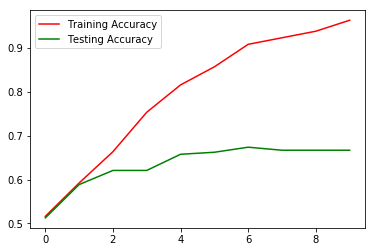

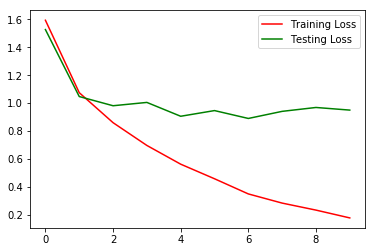

In [22]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# **Transfer Learning**

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' \
    -O '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2019-06-17 01:41:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   153MB/s    in 0.5s    

2019-06-17 01:41:44 (153 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
#x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

transfer_model = Model( pre_trained_model.input, x) 

transfer_model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [31]:
history1 = transfer_model.fit_generator(
            train_generator,
            validation_data = test_generator,
            #steps_per_epoch = 100,
            epochs = 10,
            #validation_steps = 50,
            verbose = 1)

Epoch 1/10
78/78 [==============================] - 15s 196ms/step - loss: 0.8455 - acc: 0.7045 - val_loss: 1.0205 - val_acc: 0.7195
Epoch 2/10
78/78 [==============================] - 12s 153ms/step - loss: 0.3236 - acc: 0.8904 - val_loss: 1.3214 - val_acc: 0.6966
Epoch 3/10
78/78 [==============================] - 12s 156ms/step - loss: 0.1769 - acc: 0.9437 - val_loss: 1.4047 - val_acc: 0.7149
Epoch 4/10
78/78 [==============================] - 12s 155ms/step - loss: 0.0970 - acc: 0.9727 - val_loss: 1.6099 - val_acc: 0.7103
Epoch 5/10
78/78 [==============================] - 12s 155ms/step - loss: 0.0622 - acc: 0.9817 - val_loss: 1.4660 - val_acc: 0.7264
Epoch 6/10
78/78 [==============================] - 12s 154ms/step - loss: 0.0504 - acc: 0.9856 - val_loss: 3.0969 - val_acc: 0.6023
Epoch 7/10
78/78 [==============================] - 12s 155ms/step - loss: 0.0435 - acc: 0.9897 - val_loss: 2.1705 - val_acc: 0.7218
Epoch 8/10
78/78 [==============================] - 12s 157ms/step - 

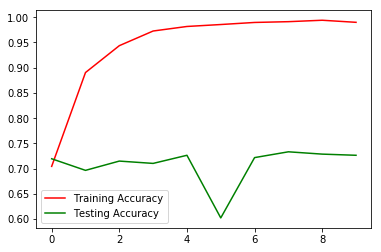

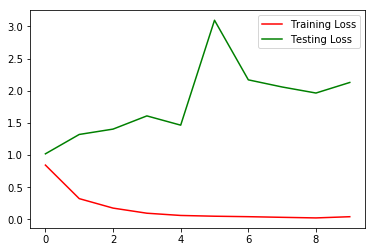

In [32]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [0]:
#Clean Up
import os,signal
os.kill(os.getpid(),signal.SIGKILL)

In [0]:
#Removing Non empty directory
import shutil
shutil.rmtree('/tmp/Flowers/')